In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2, os
import tensorflow as tf
from tensorflow.keras import  layers, models
from sklearn.model_selection import train_test_split
from PIL import Image, ImageCms

In [2]:
def set_seed(seed=2137):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()
DATA_PATH = 'data/landscape/'
IMG_DIM =(224,224)
LEARNING_RATE = 0.01

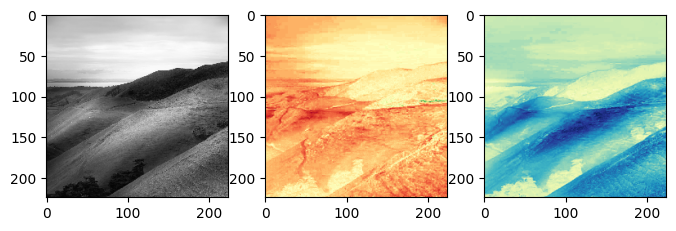

In [3]:
img_test = cv2.imread(DATA_PATH + '00000000.jpg')
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2LAB)
img_test = cv2.resize(img_test,IMG_DIM)
plt.figure(figsize=(8,8))
ax = plt.subplot(1,3,1)
plt.imshow(img_test[:,:,0],cmap='gray')
ax = plt.subplot(1,3,2)
plt.imshow(img_test[:,:,1],cmap='RdYlGn')
ax = plt.subplot(1,3,3)
plt.imshow(img_test[:,:,2],cmap='YlGnBu')



In [7]:
X = []
y = []
for imgdir in os.listdir(DATA_PATH):
    img = cv2.imread(DATA_PATH + imgdir)
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    img_lab_rs = cv2.resize(img_lab,IMG_DIM)
    img_l = img_lab_rs[:,:,0]
    img_ab = img_lab_rs[:,:,1:] 
    X.append(img_l[...,np.newaxis]) # [...,np.newaxis] sprawia że mamy tensor (128,128,1) a nie (128,128)
    y.append(img_ab)
    
X = np.array(X)
y = np.array(y)
X = X /255
y = y / 128 -1 

    

In [8]:
X_train,X_test, y_train,y_test = train_test_split(X, y,test_size=0.2)
input_shape = X_train[0].shape
print(input_shape)

(224, 224, 1)


In [20]:
model = keras.Sequential([
    layers.InputLayer(shape=input_shape),

    
    layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=1),
    layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=2),
    layers.BatchNormalization(),

   
    layers.Conv2D(128, (3,3), activation='relu', padding='same', strides=1),
    layers.Conv2D(128, (3,3), activation='relu', padding='same', strides=2),
    layers.BatchNormalization(),

   
    layers.Conv2D(256, (3,3), activation='relu', padding='same', strides=1),
    layers.Conv2D(256, (3,3), activation='relu', padding='same', strides=2),
    layers.BatchNormalization(),

    
    layers.Conv2D(512, (3,3), activation='relu', padding='same', strides=1),
    layers.Conv2D(512, (3,3), activation='relu', padding='same', strides=1),
    layers.BatchNormalization(),

    
    layers.Conv2D(512, (3,3), activation='relu', padding='same', strides=1, dilation_rate=2),
    layers.Conv2D(512, (3,3), activation='relu', padding='same', strides=1, dilation_rate=2),
    layers.BatchNormalization(),

    
    layers.Conv2D(512, (3,3), activation='relu', padding='same', strides=1, dilation_rate=2),
    layers.Conv2D(512, (3,3), activation='relu', padding='same', strides=1, dilation_rate=2),
    layers.BatchNormalization(),

    
    layers.Conv2D(512, (3,3), activation='relu', padding='same', strides=1),
    layers.Conv2D(512, (3,3), activation='relu', padding='same', strides=1),
    layers.BatchNormalization(),

    
    layers.Conv2DTranspose(256, (4,4), strides=2, activation='relu', padding='same'), 
    layers.Conv2D(256, (3,3), activation='relu', padding='same', strides=1),
    layers.BatchNormalization(),

    layers.Conv2DTranspose(64, (4,4), strides=2, activation='relu', padding='same'),
    layers.Conv2DTranspose(32, (4,4), strides=2, activation='relu', padding='same'),
    layers.Conv2D(2, (3,3), activation='tanh', padding='same'),
])

In [21]:

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)                   │ (None, 224, 224, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 28, 28, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 28, 28, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 28, 28, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,837,154 (83.30 MB)

 Trainable params: 21,831,650 (83.28 MB)

 Non-trainable params: 5,504 (21.50 KB)